<a href="https://colab.research.google.com/github/chandan3324/Machine-Learning/blob/main/18_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time Series Decomposition

In [1]:
%pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.3 MB/s eta 0:00:00


In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/AirPassengers.csv"
print(url)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/AirPassengers.csv


In [4]:
import pandas as pd
df = pd.read_csv(url, parse_dates=True, index_col="Month")
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Plot the graph for Number of Passengers

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

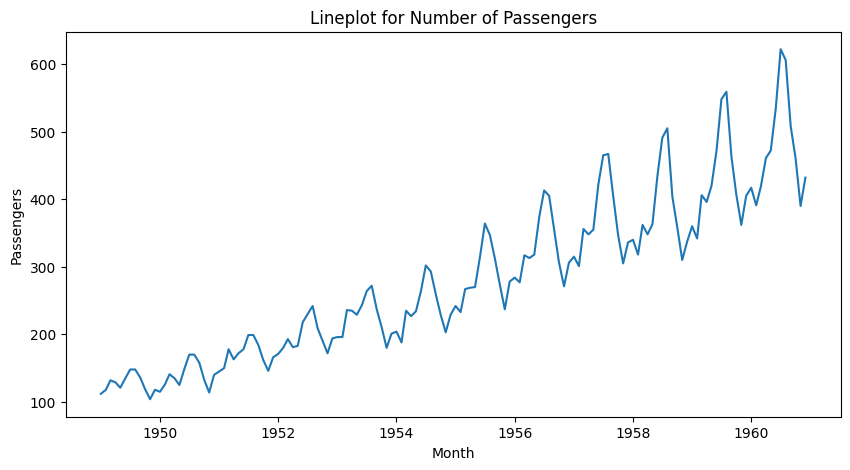

In [6]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x=df.index, y="Passengers")
plt.title("Lineplot for Number of Passengers")
plt.show()

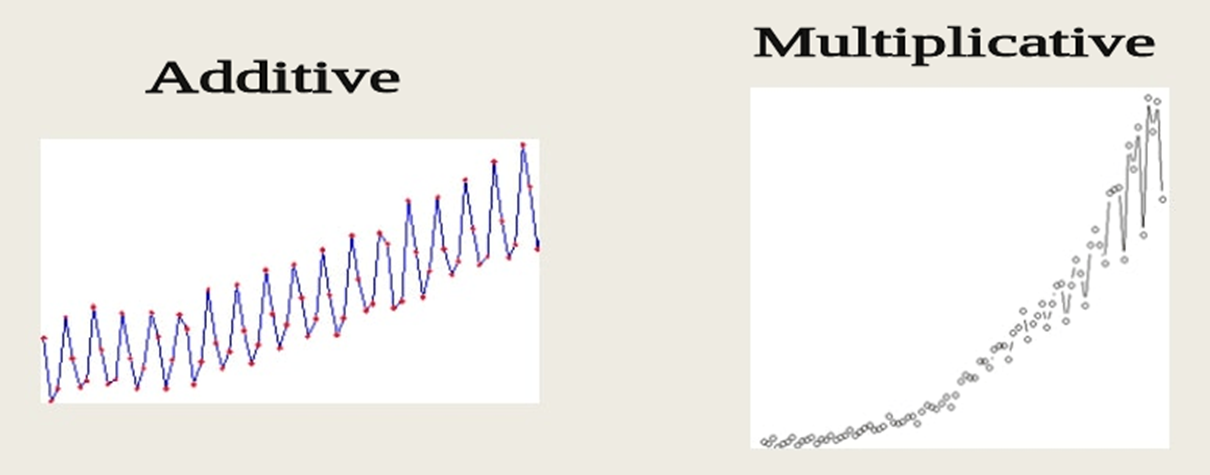

### Time Series decomposition

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
q = seasonal_decompose(df["Passengers"], model="multiplicative")

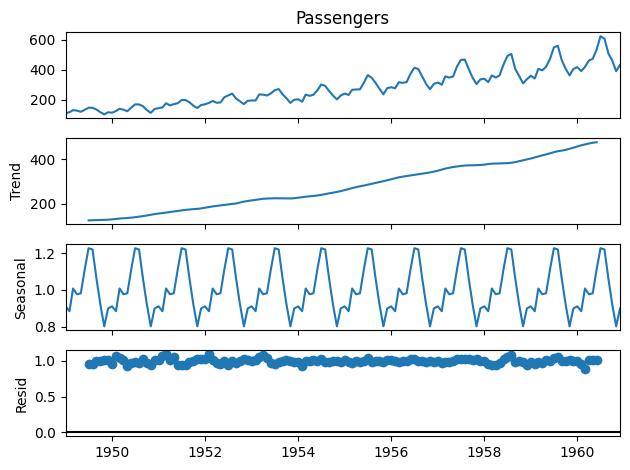

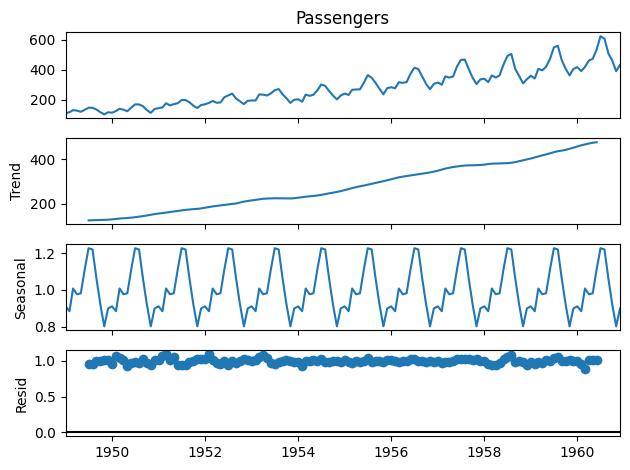

In [9]:
q.plot()

### Showing observed value and trend

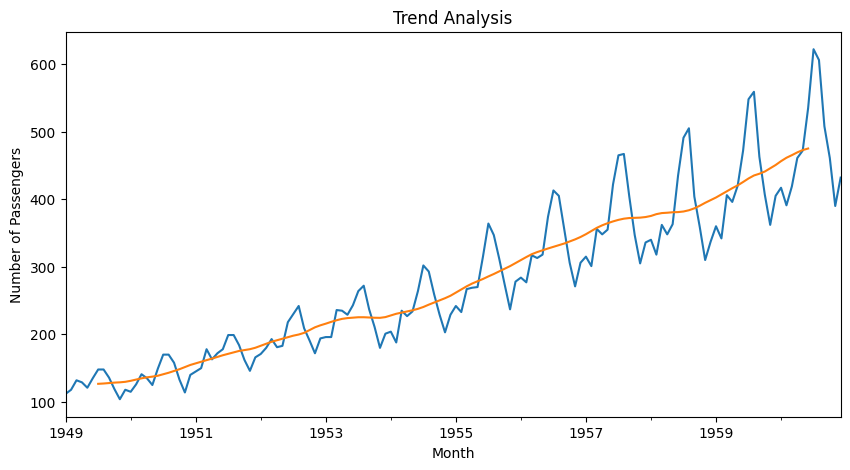

In [10]:
plt.figure(figsize=(10, 5))
q.observed.plot()
q.trend.plot()
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.title("Trend Analysis")
plt.show()

### Show seasonality

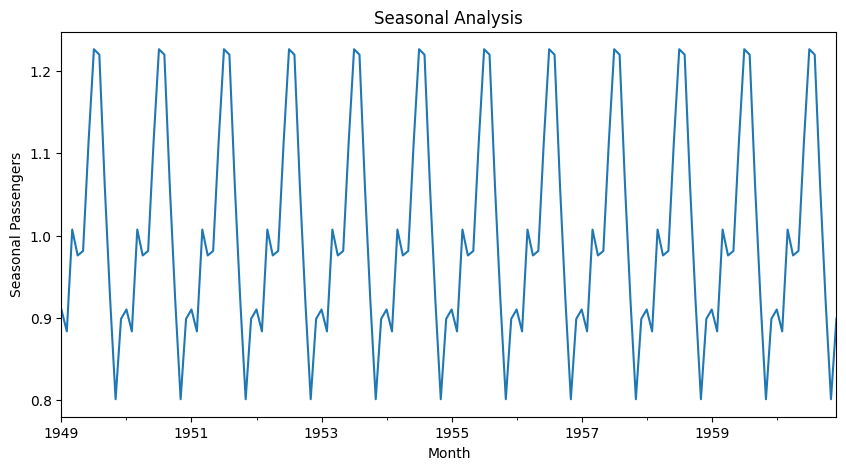

In [11]:
plt.figure(figsize=(10, 5))
q.seasonal.plot()
plt.xlabel("Month")
plt.ylabel("Seasonal Passengers")
plt.title("Seasonal Analysis")
plt.show()

### Show Residuals

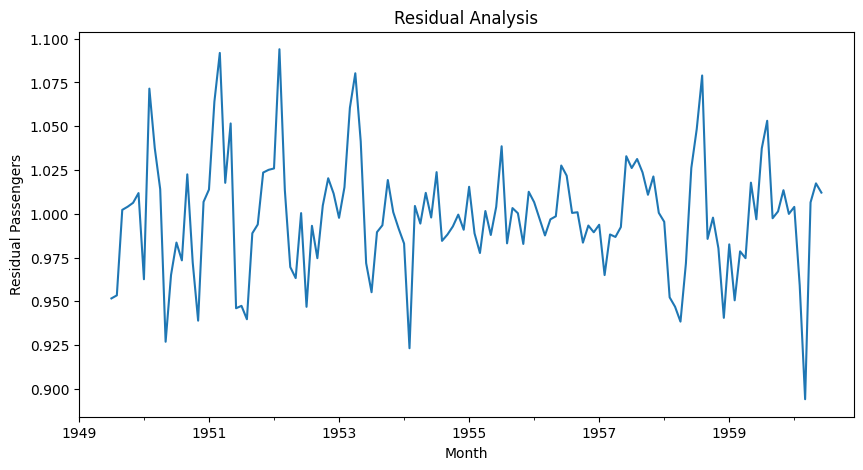

In [12]:
plt.figure(figsize=(10, 5))
q.resid.plot()
plt.xlabel("Month")
plt.ylabel("Residual Passengers")
plt.title("Residual Analysis")
plt.show()

### Above is multiplicative model hence
yt = Trend x Season x Residuals

### Time Series Forecasting

### Best on past data try to estimate the future values

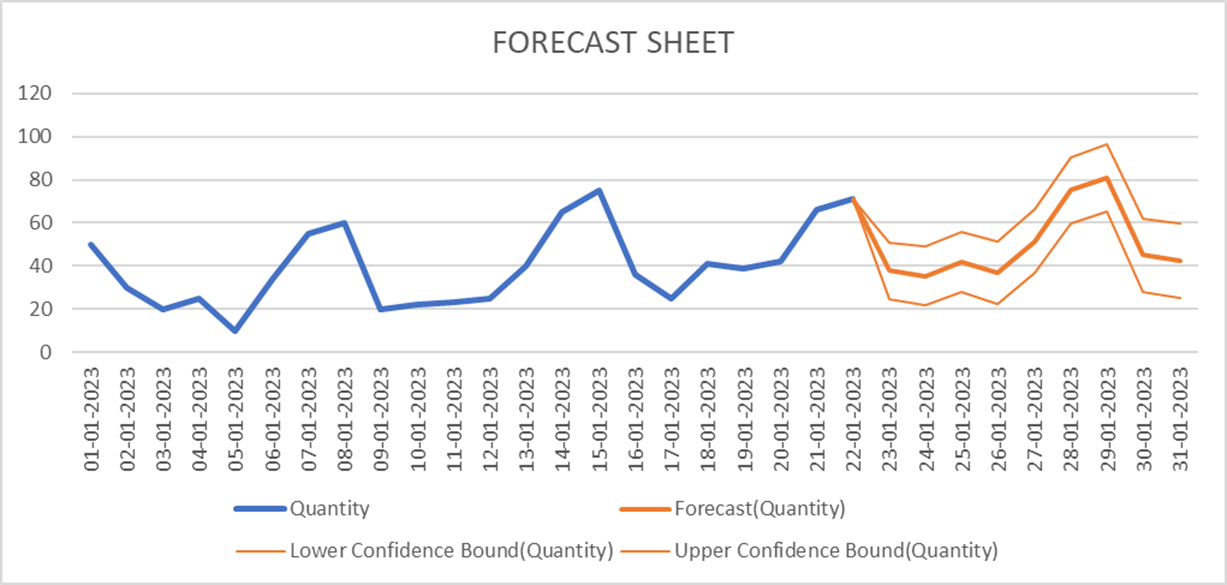

In [13]:
from pmdarima.arima import auto_arima

In [14]:
model = auto_arima(df["Passengers"], seasonal=True, m=12)

In [15]:
model.order

(2, 1, 1)

# ARIMA(2, 1, 1)
p=2, d=1, q=1

In [17]:
model

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

### Estimate future 4 year demanf for Air Passengers
4 year = 4*12 = 48 months

In [18]:
forecast, conf = model.predict(n_periods=48, return_conf_int=True)

In [19]:
forecast

,0
1961-01-01,445.634934
1961-02-01,420.395024
1961-03-01,449.198348
1961-04-01,491.839976
1961-05-01,503.394502
1961-06-01,566.862471
1961-07-01,654.260189
1961-08-01,638.597493
1961-09-01,540.883739
1961-10-01,494.126610


In [20]:
conf

array([[423.34484757, 467.92501952],
       [394.23539679, 446.55465213],
       [419.83171141, 478.56498452],
       [460.37625926, 523.30369276],
       [470.38045292, 536.40855182],
       [532.69931939, 601.02562216],
       [619.22112948, 689.29924892],
       [602.87983183, 674.31515457],
       [504.63120707, 577.13627077],
       [457.44583825, 530.80738157],
       [386.30372821, 460.36165208],
       [428.1911891 , 502.82391072],
       [433.49735818, 525.08434836],
       [405.10869698, 503.24497681],
       [431.1554372 , 535.01852521],
       [471.84033434, 579.79816045],
       [481.87334967, 593.02801195],
       [544.15634767, 657.81146303],
       [630.60850683, 746.26548123],
       [614.17889589, 731.46366422],
       [515.83210925, 634.46267142],
       [468.54379213, 588.30438119],
       [397.29693225, 518.02080357],
       [439.07958457, 560.63657678],
       [446.3268565 , 580.99723894],
       [418.31792814, 558.81320108],
       [444.62395763, 590.35721439],
 

In [21]:
forecast = forecast.to_frame()
forecast.columns = ["forecast"]

In [22]:
forecast[["lower", "upper"]] = conf

In [23]:
forecast

,forecast,lower,upper
1961-01-01,445.634934,423.344848,467.925020
1961-02-01,420.395024,394.235397,446.554652
1961-03-01,449.198348,419.831711,478.564985
1961-04-01,491.839976,460.376259,523.303693
1961-05-01,503.394502,470.380453,536.408552
1961-06-01,566.862471,532.699319,601.025622
1961-07-01,654.260189,619.221129,689.299249
1961-08-01,638.597493,602.879832,674.315155
1961-09-01,540.883739,504.631207,577.136271
1961-10-01,494.126610,457.445838,530.807382


### Save above dataframe

In [25]:
forecast.to_csv("Forecast.csv")

### Plot the results

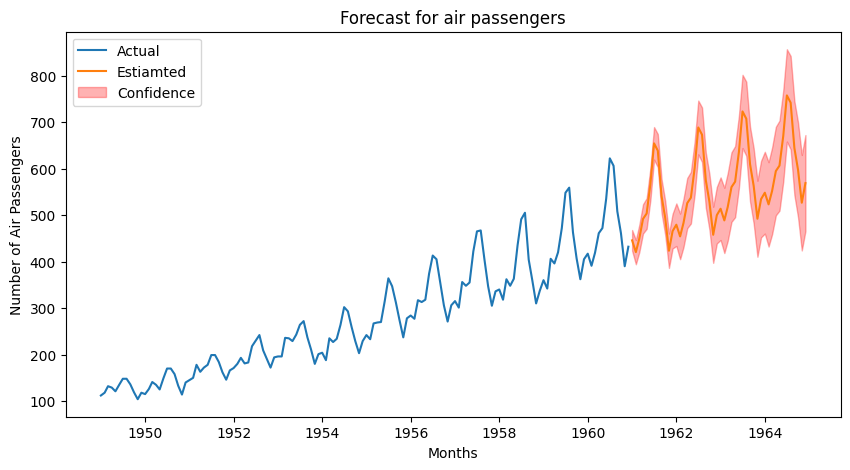

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(df["Passengers"], label="Actual")
plt.plot(forecast["forecast"], label="Estiamted")
plt.fill_between(
    forecast.index, forecast["lower"], forecast["upper"], alpha=0.3, label="Confidence", color="red")
plt.xlabel("Months")
plt.ylabel("Number of Air Passengers")
plt.title("Forecast for air passengers")
plt.legend()
plt.show()

### Save above model

In [27]:
import joblib

joblib.dump(model, "arima.joblib")

['arima.joblib']

In [28]:
m = joblib.load("/content/arima.joblib")
m

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)